<h1> Iris Clustering </h1>
<hr>
- Clustering Algorithm ( http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster )
    - K-Mean ( http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html )
    - DBScan ( http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html )
    <br>
    <br>
- Feature Selection ( http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection )

- Scikit Dataset ( http://scikit-learn.org/stable/datasets/index.html )
- Mesure ( http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics ) <br>

User Guide for Clustering: http://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import datasets



<h3> Load Iris Dataset from scikit </h3>
   - Scikit Dataset ( http://scikit-learn.org/stable/datasets/index.html )

In [2]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print( X.shape, y.shape )

(150, 4) (150,)


<h3> Feature Selection </h3>
<hr>
- Select 2 Feature with best Chi2 ranking

 ( http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection )

In [3]:
skb = SelectKBest(chi2, k=2)
skb.fit(X, y)
X_new = skb.transform(X)
print(skb.get_support())
print(X_new.shape)

[False False  True  True]
(150, 2)


<h3> Cluster Analysis </h3>
<hr>
แบ่งครัสเตอร์ด้วย K-mean จำเป็นต้องระบุ จำนวนครัสเตอร์ ผ่าน พารามิเตอร์ n_cluster

In [4]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<h3> Result <h3>
<hr>

In [5]:
clust_kmean = k_means.labels_
print(clust_kmean[::10]) # ผลจากการแบ่ง
print(y[::10]) # กลุ่มจริง

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


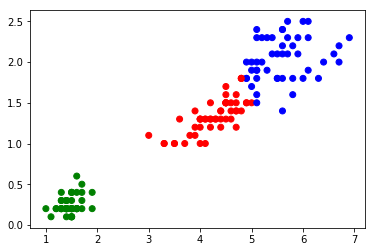

In [6]:
color = 'rgb'[0]
colors = ['rgb'[x] for x in clust_kmean]
plt.scatter(X_new[:, 0], X_new[:, 1], c=colors, cmap=plt.cm.Paired)
plt.show()

[ 0  0  0  0  0  1 -1  1  1  1 -1  1  2 -1  2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


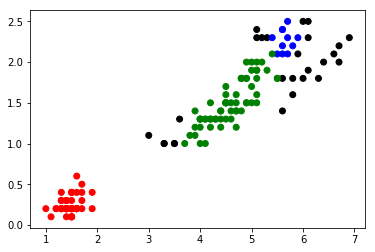

In [7]:
dbs = DBSCAN(eps =.25, min_samples=9)
dbs.fit(X_new)
clust_db = dbs.labels_
print(clust_db[::10]) # ผลจากการแบ่ง
print(y[::10]) # กลุ่มจริง
colors = ['rgbcmyk'[x] for x in clust_db]
plt.scatter(X_new[:, 0], X_new[:, 1], c=colors, cmap=plt.cm.Paired)
plt.show()

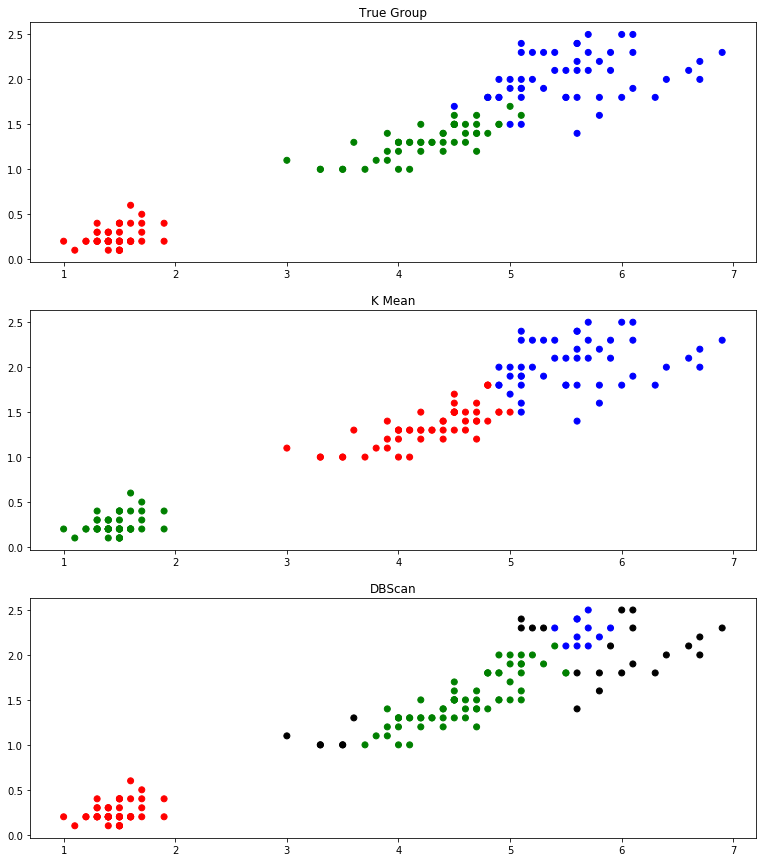

In [8]:
fig1 = plt.figure('Fig 1', figsize=(13, 15))

ax1_1= fig1.add_subplot(3, 1, 1)
ax1_1.set_title('True Group')
ax1_1.scatter(X_new[:, 0], X_new[:, 1], c=['rgbcmyk'[x] for x in y], cmap=plt.cm.Paired)

ax1_2 = fig1.add_subplot(3, 1, 2)
ax1_2.set_title('K Mean')
ax1_2.scatter(X_new[:, 0], X_new[:, 1], c=['rgbcmyk'[x] for x in clust_kmean], cmap=plt.cm.Paired)

ax1_3 = fig1.add_subplot(3, 1, 3)
ax1_3.set_title('DBScan')
ax1_3.scatter(X_new[:, 0], X_new[:, 1], c=['rgbcmyk'[x] for x in clust_db], cmap=plt.cm.Paired)